In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brexit_data = pd.read_csv('brexit_postcodes.csv')
income_data = pd.read_csv('income_postcodes.csv')
imd_data = pd.read_csv('imd.csv')
price_data = pd.read_csv('../samuel/Area_mean.csv',header=0,names=['PC_0','Price'])

In [3]:
print(brexit_data.shape[0])
print(income_data.shape[0])
print(imd_data.shape[0])
print(price_data.shape[0])

2995
2995
2321
2391


In [4]:
brexit_data = brexit_data.set_index('PC_0').join(price_data.set_index('PC_0'))
income_data = income_data.set_index('PC_0').join(price_data.set_index('PC_0'))
imd_data = imd_data.set_index('PC_0').join(price_data.set_index('PC_0'))

In [5]:
brexit_data = brexit_data[~brexit_data['Price'].isnull()]
income_data = income_data[~income_data['Price'].isnull()]
imd_data = imd_data[~imd_data['Price'].isnull()]

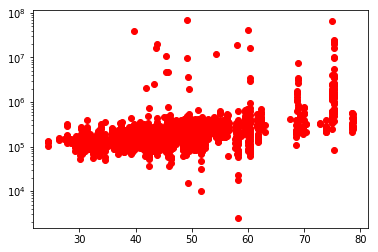

In [6]:
plt.plot(brexit_data['REMAIN'], brexit_data['Price'],'ro')
plt.yscale('log')

In [7]:
brexit_data_area = brexit_data.groupby('LEAVE').mean()
brexit_data_area = brexit_data_area.reset_index()

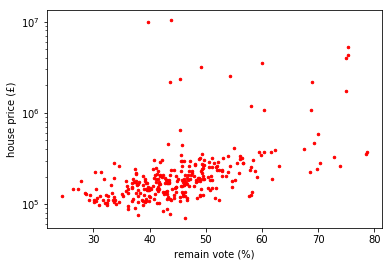

In [8]:
plt.plot(brexit_data_area['REMAIN'], brexit_data_area['Price'],'ro',markersize = 2.5)
plt.yscale('log')
plt.ylabel('house price (£)')
plt.xlabel('remain vote (%)')
plt.savefig('plots/brexit_price.pdf')

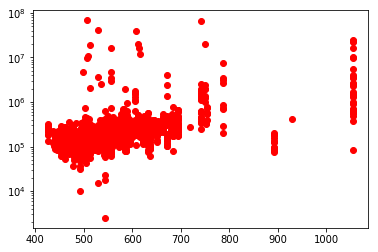

In [9]:
plt.close()
plt.plot(income_data['PAY'], income_data['Price'],'ro')
plt.yscale('log')

In [10]:
income_data_area = income_data.groupby('PAY').mean()
income_data_area = income_data_area.reset_index()

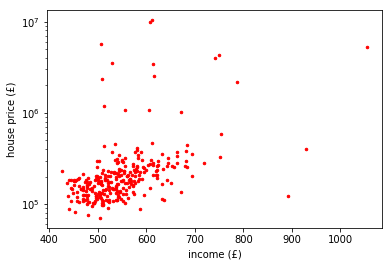

In [12]:
plt.close()
plt.plot(income_data_area['PAY'], income_data_area['Price'],'ro',markersize = 2.5)
plt.yscale('log')
plt.ylabel('house price (£)')
plt.xlabel('income (£)')
plt.savefig('plots/income_price.pdf')

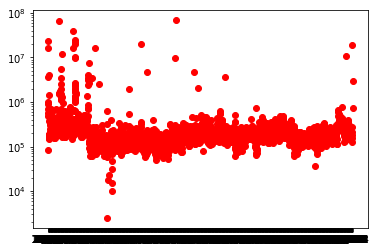

In [13]:
plt.close()
plt.plot(imd_data['index_scaled'], imd_data['Price'],'ro')
plt.yscale('log')

In [16]:
imd_data_area = imd_data.groupby('index_scaled').mean()
imd_data_area = imd_data_area.reset_index()

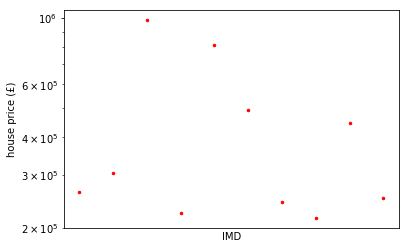

In [17]:
plt.close()
plt.plot(imd_data_area['index_scaled'], imd_data_area['Price'],'ro',markersize = 2.5)
plt.xticks([])
plt.yscale('log')
plt.ylabel('house price (£)')
plt.xlabel('IMD')
plt.savefig('plots/imd_price.pdf')